# Replication assignment

Replicate the results found in [Bryant et al  (2010)](https://doi.org/10.1016/j.techfore.2009.08.002), [Rozenberg et al (2014)](https://link.springer.com/content/pdf/10.1007/s10584-013-0904-3.pdf), and [Hamarat et al (2013)](https://doi.org/10.1016/j.techfore.2012.10.004). The data files are named accordingly. You can also look at [Kwakkel & Jaxa-Rozen (2016)](https://www.sciencedirect.com/science/article/pii/S1364815215301092), which gives a succint summary of these three cases. 

An additional useful, if dated, resource for Bryant et al is https://waterprogramming.wordpress.com/2015/08/05/scenario-discovery-in-python/ 



In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ema_workbench.analysis import prim
from ema_workbench.util import ema_logging

# Bryant & Lempert

Load the data using pandas. The experiments are in colums 2-10, while the outcome is in column 15. If you look at the paper carefully, you will see that they change the peel_alpha in PRIM. This controls the leniency of the algorithm.


In [54]:
Bryant = pd.read_csv('data/Bryant et al 2010.csv')
Bryant.head()

,renew req %,Pricing,Cellulosic cost,Total biomass,Feedstock distribution,Cellulosic yield,Oil elasticity,Demand elasticity,Electricity coproduction,oil supply shift,Biomass backstop price,input record,Expen change,Incremental cost,Less than 10%,Greater than 90%
0,0.25,1,124.900002,612.799988,0.04,89.500000,0.206,-0.469,1.83,0.078,162.199997,1001,60.00,276.47,0,0
1,0.25,1,67.300003,837.200012,0.18,95.900002,0.277,-0.380,0.01,-0.032,150.300003,1002,19.42,85.07,0,0
2,0.25,1,71.000000,740.400024,0.80,83.500000,0.445,-0.778,0.25,-0.093,135.800003,1003,17.76,200.11,0,0
3,0.25,1,80.099998,995.599976,0.58,82.400002,0.291,-0.334,0.08,-0.086,98.800003,1004,37.88,130.86,0,0
4,0.25,1,76.400002,476.399994,0.79,97.500000,0.443,-0.205,1.59,0.073,163.500000,1006,66.13,180.11,0,0


In [93]:
for i in range(10):
    print(i * 0.1)

0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9


0.1


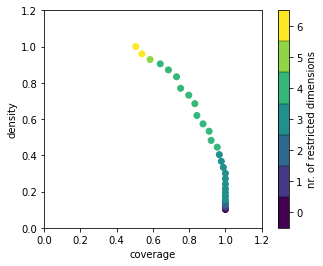

0.2


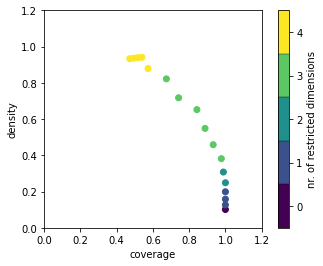

0.30000000000000004


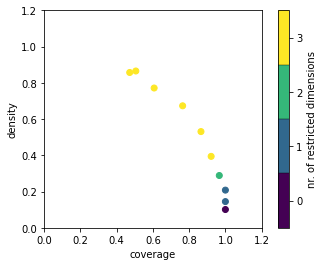

0.4


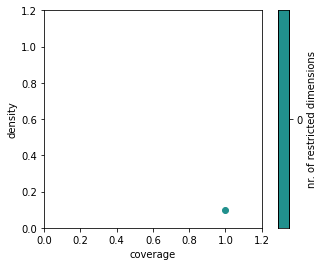

0.5


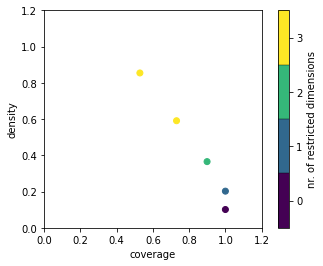

0.6


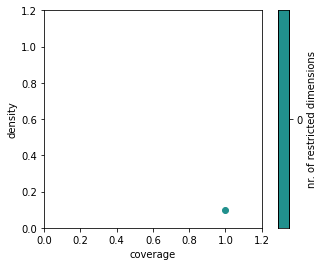

0.7000000000000001


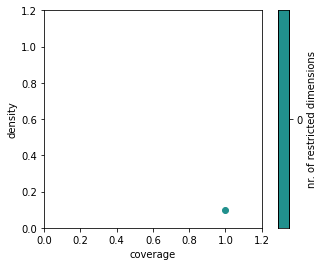

0.8


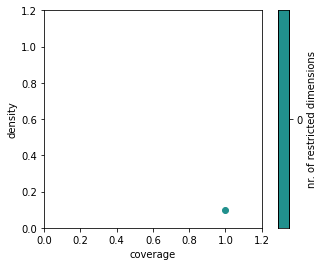

In [101]:
x = Bryant.iloc[:, 2:11]
y = Bryant.iloc[:, 15]

for i in range(8):
    nummer = i*0.1 + 0.1
    print(nummer)
    analysis = prim.Prim(x, y, threshold=0.8, peel_alpha=nummer)
    box1 = analysis.find_box()
    box1.show_tradeoff()
    plt.show()

0.1


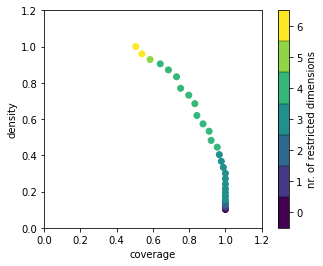

0.2


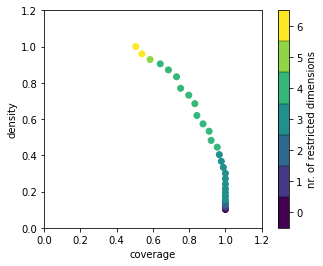

0.30000000000000004


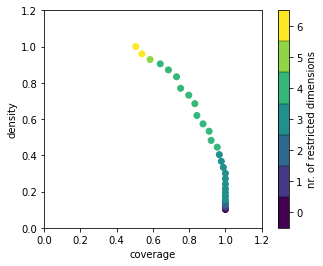

0.4


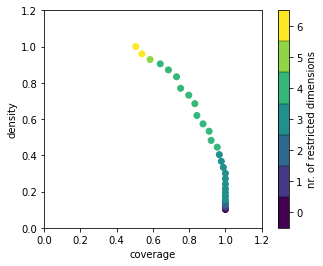

0.5


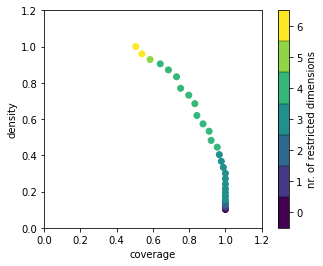

0.6


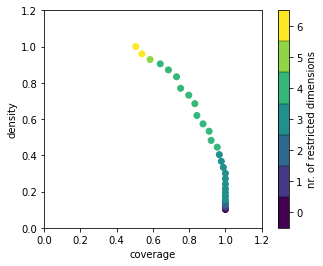

0.7000000000000001


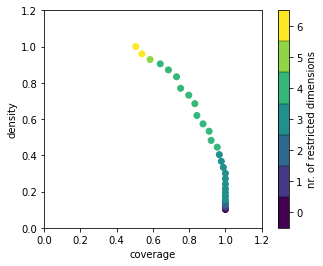

0.8


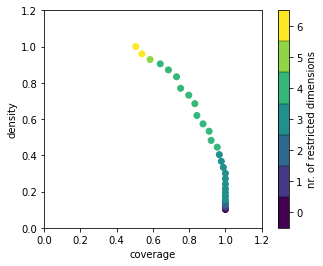

In [102]:
for i in range(8):
    nummer = i*0.1 + 0.1
    print(nummer)
    analysis = prim.Prim(x, y, threshold=nummer, peel_alpha=0.1)
    box1 = analysis.find_box()
    box1.show_tradeoff()
    plt.show()

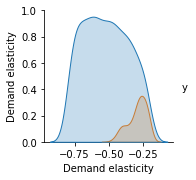

In [85]:
box1.select(1)
fig = box1.show_pairs_scatter()
#fig.set_size_inches((12,12))
plt.show()

# Rozenberg et al


* The experiments are the first seven columns. The remainder specify whether a given experiment belongs to a given SSP.
* Apply prim separately for each SSP
* you have to play with the threshold for each SSP, the default of 0.8 is at times too high
* if you look at the paper carefully, you will discover that they change some of the default parameters of PRIM


In [3]:
Rozenberg = pd.read_csv('data/Rozenberg et al 2014.csv')
Rozenberg.head()

,inequalities,convergence,population,behaviors,technologies,fossils,capital markets,SSP1,SSP2,SSP3,SSP4,SSP5
0,0,2,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,1,0,0,0,0,0
2,0,2,0,0,0,1,0,0,0,0,0,0
3,0,2,0,0,0,1,1,0,0,0,0,0
4,0,2,0,0,1,0,0,0,1,0,0,0


# Hamarat et al

this is the most difficult dataset to analyze with prim. It has been generated using the ema_workbench and can be loaded with the `load_results` function. Experiments are of interest if the end state for `'fraction renewables'` is lower than the initial value.

* PRIM struggles with finding a good explanation for this case, why?
* [Dalal et al (2013)](https://www.sciencedirect.com/science/article/pii/S1364815213001345) suggest using PCA preprocessing. The ema_workbench supports this with the `pca_preprocess` function. See also examples/prim_PCA_preprocess.py. Does PCA preprocessing makes a difference for this case?


In [4]:
data = outcomes['fraction renewables']
# y = data[0,:] < data[-1, :]
r1 = outcomes[y1] < t1
r2 = outcomes[y2] > t2
r3 = outocmes[y3] < t3
rc = r1 or (r2 or r3)



NameError: name 'outcomes' is not defined